In [1]:
# gmm, r-mclust
# simulation

import math
import networkx as nx
import graspy
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from graspy.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspy.plot import heatmap, pairplot
from graspy.cluster.pyclust import PyclustCluster
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.sparse.linalg import eigsh 
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [2]:
# generate 4-blocks SBM graph using python
np.random.seed(3000)

n_verts = 800
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

P = np.array(
	[[0.018932108, 0.042869173, 0.002084243, 0.008436194],
	[0.042869173, 0.112538688, 0.009629583, 0.040333219],
	[0.002084243, 0.009629583, 0.019360040, 0.044269707],
	[0.008436194, 0.040333219, 0.044269707, 0.115217630	]])

undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)

In [3]:
# ASE using python
ase = AdjacencySpectralEmbed()
ase_Xhat = ase.fit_transform(undirected_sbm)
# save ASE results to do mclust using R
np.savetxt("F:/JHU_Summer/RESULTS/ase1.csv", ase_Xhat, delimiter=',')

# R
# data<-read.csv('F:/JHU_Summer/RESULTS/ase1.csv',sep=',',header=F)
# clust=Mclust(data, G=2,verbose=0)
# write.table(clust[["classification"]]-1, file="F:/JHU_Summer/RESULTS/mclust.csv",,sep = ',',row.names=F,col.names = F, append = T)

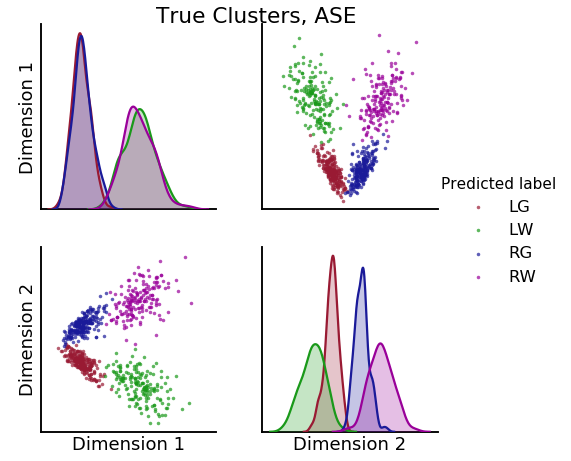

In [4]:
#Visualization- true clusters
palette_true = {'LG':(0.6,0.1,0.2),
                'LW':(0.1,0.6,0.1),
                'RG':(0.1,0.1,0.6),
                'RW':(0.6,0,0.6)}
pairplot(ase_Xhat,
         labels=labels_sbm,
         title='True Clusters, ASE',
         legend_name='Predicted label',
         height=3.5,
         palette= palette_true)

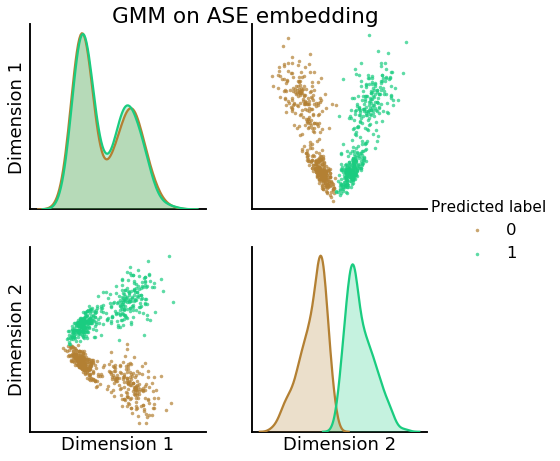

In [5]:
# gaussian mixture clusting using python
gmm_ase = GaussianMixture(n_components=2).fit(ase_Xhat)
ase_gmm = gmm_ase.predict(ase_Xhat)
# print(ase_gmm)
# visualization
palette_pre = {0:(0.7,0.5,0.2),
           1:(0.1,0.8,0.5)}
pairplot(ase_Xhat,
         labels=ase_gmm,
         title='GMM on ASE embedding',
         legend_name='Predicted label',
         height=3.5,
         palette= palette_pre)

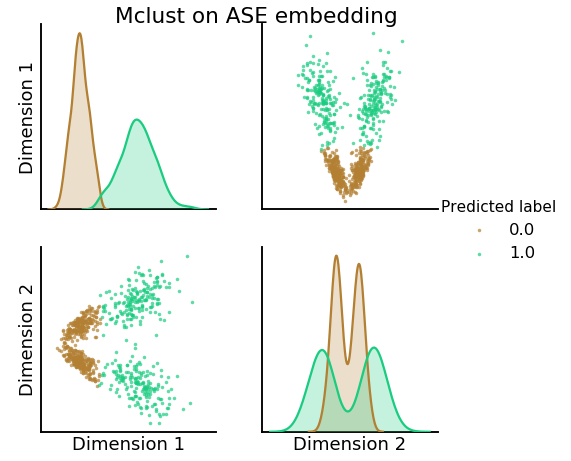

In [9]:
# read the clusting result of mclust in R
# and visulization
mclust_re=np.loadtxt("F:/JHU_Summer/RESULTS/mclust.csv",delimiter=",")
pairplot(ase_Xhat,
         labels=mclust_re,
         title='Mclust on ASE embedding',
         legend_name='Predicted label',
         height=3.5,
         palette= palette_pre)

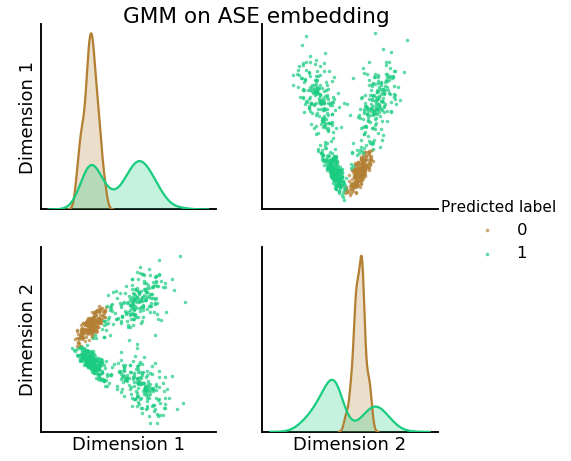

In [10]:
# initialize gmm in python with final model of mclust in R
weights_init=np.array([0.535,0.465])
means_init=np.array([[0.091506632, 0.268856142],[-0.003387676,0.003164674]])
sigma_init=np.array([[[0.000690643,0.00000000],[0.000000000,0.00831941]],[[0.003190566,0.0000000],[0.000000000,0.0384332]]])
precisions_init=np.linalg.inv(sigma_init)

#rerun gmm in python
gmm_ase = GaussianMixture(n_components=2,weights_init=weights_init,means_init=means_init,precisions_init=precisions_init).fit(ase_Xhat)
ase_gmm = gmm_ase.predict(ase_Xhat)
pairplot(ase_Xhat,
         labels=ase_gmm,
         title='GMM on ASE embedding',
         legend_name='Predicted label',
         height=3.5,
         palette= palette_pre)